In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing, decomposition, ensemble, inspection
import seaborn as sns; sns.set()

In [3]:
df = pd.read_csv('covid.csv')

In [4]:
#df = pd.read_csv('https://raw.githubusercontent.com/cosmostatschool/MACSS2021/main/BayesianInference_ML_Kirkby/covid.csv')

In [5]:
df = df.dropna()

In [6]:
df

,country,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,BBIBP-CorV,Oxford/AstraZeneca,Pfizer/BioNTech,...,"Fertility rate, total (live births per woman)",Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),Threatened species (number),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)","Pop. using improved sanitation facilities (urban/rural, %)"
0,Afghanistan,765890.0,582128.0,12986.0,1.97,1.50,334.0,True,True,True,...,5.3,68.6,8.2,27.7,8.3,42,2.1,63,5,21.43
1,Albania,901429.0,525800.0,7571.0,31.32,18.27,2631.0,False,True,True,...,1.7,14.6,5.9,22.9,63.3,130,28.2,84,36,2.96
2,Algeria,2500000.0,2500000.0,22664.0,5.70,5.70,517.0,False,True,False,...,3,27.7,7.2,31.6,38.2,135,0.8,5900,55,0.05
3,Andorra,63265.0,38667.0,1737.0,81.88,50.04,22481.0,False,True,True,...,1.2,-99,8.1,32.1,96.9,13,34,1,119,-99
4,Angola,1380174.0,866381.0,14642.0,4.20,2.64,446.0,False,True,False,...,6,65.4,3.3,38.2,12.4,146,46.5,3902,25,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Uzbekistan,2695058.0,1623764.0,39902.0,8.05,4.85,1192.0,False,True,False,...,2.4,31.3,5.8,16.0,42.8,59,7.6,2339,62,0.66
178,Vanuatu,7462.0,7462.0,419.0,2.43,2.43,1364.0,False,True,False,...,3.4,24.3,5.0,0.0,22.4,137,36.1,1,12,12.32
179,Yemen,251385.0,251385.0,3252.0,0.84,0.84,109.0,False,True,False,...,4.4,47.2,5.6,0.0,25.1,298,1,668,12,2.99
180,Zambia,148304.0,142089.0,91.0,0.81,0.77,5.0,False,True,False,...,5.2,53.8,5.0,18.0,21.0,88,65.6,374,26,3.96


In [7]:
df.iloc[np.isin(df['country'], ('Mexico','United Kingdom')),:15]

,country,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,BBIBP-CorV,Oxford/AstraZeneca,Pfizer/BioNTech,Sinovac,Sputnik V,Sinopharm/Beijing,Johnson&Johnson,Moderna
106,Mexico,41368066.0,28590500.0,445643.0,32.08,22.17,3456.0,False,True,True,True,True,False,False,False
175,United Kingdom,75188795.0,43448680.0,389619.0,110.76,64.00,5739.0,False,True,True,False,False,False,False,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 181
Data columns (total 57 columns):
country                                                       167 non-null object
total_vaccinations                                            167 non-null float64
people_vaccinated                                             167 non-null float64
daily_vaccinations                                            167 non-null float64
total_vaccinations_per_hundred                                167 non-null float64
people_vaccinated_per_hundred                                 167 non-null float64
daily_vaccinations_per_million                                167 non-null float64
BBIBP-CorV                                                    167 non-null bool
Oxford/AstraZeneca                                            167 non-null bool
Pfizer/BioNTech                                               167 non-null bool
Sinovac                                                       167 non-null 

In [9]:
df.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 181
Data columns (total 26 columns):
total_vaccinations                                       167 non-null float64
people_vaccinated                                        167 non-null float64
daily_vaccinations                                       167 non-null float64
total_vaccinations_per_hundred                           167 non-null float64
people_vaccinated_per_hundred                            167 non-null float64
daily_vaccinations_per_million                           167 non-null float64
Surface area (km2)                                       167 non-null int64
Population in thousands (2017)                           167 non-null int64
Population density (per km2, 2017)                       167 non-null float64
Sex ratio (m per 100 f, 2017)                            167 non-null float64
GDP: Gross domestic product (million current US$)        167 non-null int64
GDP growth rate (annual %, const. 2005 pric

In [10]:
df.describe()

,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,daily_vaccinations_per_million,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",...,Food production index (2004-2006=100),International trade: Imports (million US$),International trade: Balance (million US$),Urban population (% of total population),Health: Total expenditure (% of GDP),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Individuals using the Internet (per 100 inhabitants),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)"
count,1.670000e+02,1.670000e+02,1.670000e+02,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02,167.000000,167.000000,...,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7.467973e+06,5.214683e+06,1.066839e+05,42.365449,26.134551,4231.928144,4.980209e+05,2.938065e+04,398.547904,99.749701,...,102.532934,5.880682e+04,-364.197605,58.791617,-3.975449,11.228743,45.947904,211.251497,1472.718563,86.335329
std,2.611207e+07,2.053688e+07,4.298964e+05,41.924249,24.043658,5179.174545,1.259078e+06,1.096322e+05,2117.833159,24.337293,...,60.859980,1.380962e+05,33024.501906,24.263350,32.177462,36.449211,36.157983,306.362623,3515.582104,123.747100
min,2.600000e+03,1.394000e+03,2.000000e+00,0.090000,0.090000,2.000000,-9.900000e+01,4.000000e+00,0.100000,-99.000000,...,-99.000000,-9.900000e+01,-219713.000000,8.400000,-99.000000,-99.000000,-99.000000,1.000000,-99.000000,-99.000000
25%,1.036970e+05,6.939700e+04,9.475000e+02,5.000000,3.855000,606.500000,1.189800e+04,8.600000e+02,34.400000,96.300000,...,98.000000,1.637000e+03,-3799.000000,39.750000,4.350000,10.900000,21.350000,58.500000,7.500000,21.000000
50%,6.628040e+05,5.082710e+05,7.571000e+03,30.380000,20.110000,2799.000000,1.110020e+05,6.811000e+03,85.500000,98.500000,...,113.000000,7.236000e+03,-1001.000000,59.000000,5.900000,19.200000,49.600000,98.000000,129.000000,55.000000
75%,3.867926e+06,2.500098e+06,4.917850e+04,72.455000,45.215000,6430.500000,4.559045e+05,2.276550e+04,212.850000,101.150000,...,131.500000,4.044000e+04,-75.000000,78.300000,8.100000,29.100000,73.000000,222.500000,1005.500000,108.500000
max,2.933703e+08,2.417205e+08,5.006348e+06,231.420000,116.270000,46231.000000,9.984670e+06,1.339180e+06,25969.800000,301.200000,...,180.000000,1.060672e+06,280080.000000,100.000000,16.500000,61.300000,98.300000,2358.000000,23103.000000,952.000000


In [11]:
df.to_csv('mydata.csv', index=False)

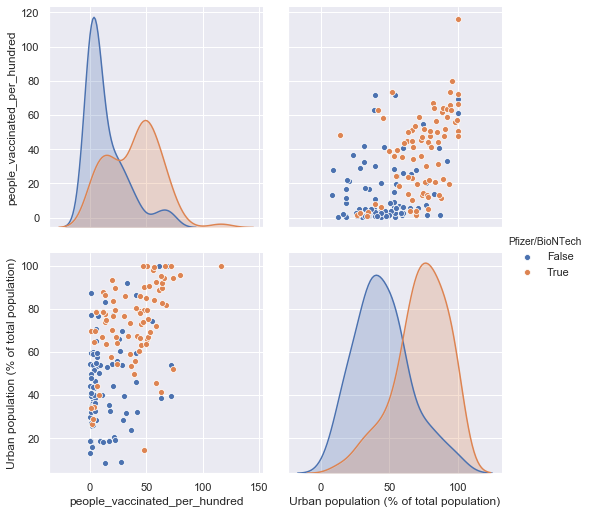

In [12]:
sns.pairplot(df, vars=(
    'people_vaccinated_per_hundred','Urban population (% of total population)'
), hue='Pfizer/BioNTech', height=3.5);

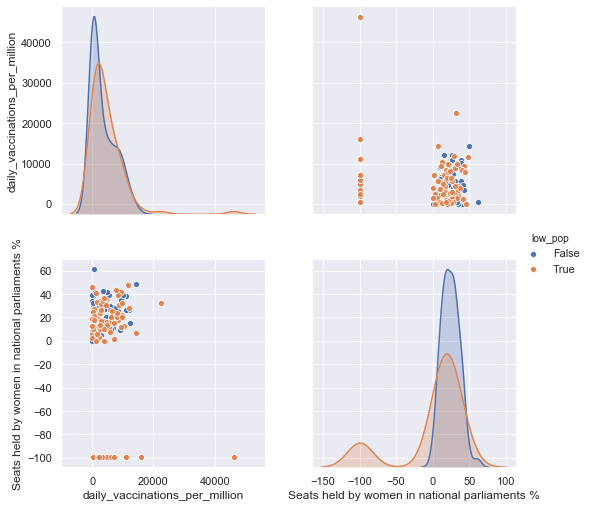

In [16]:
sns.pairplot(df, vars=(
    'daily_vaccinations_per_million','Seats held by women in national parliaments %'
), hue='low_pop', height=3.5);

In [15]:
df['low_pop'] = df['Population in thousands (2017)'] < 10000

In [18]:
df.to_csv('newdata.csv', index=False)

In [19]:
data = df.select_dtypes('number')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 181
Data columns (total 26 columns):
total_vaccinations                                       167 non-null float64
people_vaccinated                                        167 non-null float64
daily_vaccinations                                       167 non-null float64
total_vaccinations_per_hundred                           167 non-null float64
people_vaccinated_per_hundred                            167 non-null float64
daily_vaccinations_per_million                           167 non-null float64
Surface area (km2)                                       167 non-null int64
Population in thousands (2017)                           167 non-null int64
Population density (per km2, 2017)                       167 non-null float64
Sex ratio (m per 100 f, 2017)                            167 non-null float64
GDP: Gross domestic product (million current US$)        167 non-null int64
GDP growth rate (annual %, const. 2005 pric

In [21]:
ppdata = preprocessing.scale(data) # x -> (x-mu)/std

In [22]:
pca = decomposition.PCA().fit(ppdata)

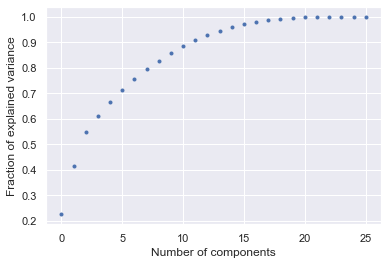

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '.')
plt.xlabel('Number of components')
plt.ylabel('Fraction of explained variance');

In [27]:
pca = decomposition.PCA(n_components=10).fit(ppdata)

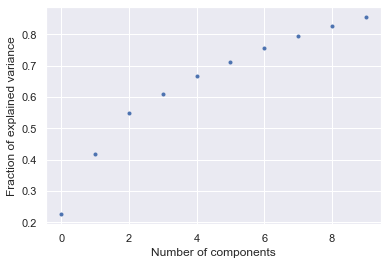

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '.')
plt.xlabel('Number of components')
plt.ylabel('Fraction of explained variance');

In [28]:
Y = pca.transform(ppdata)
M = pca.components_

In [29]:
ppdata.shape, Y.shape, M.shape

((167, 26), (167, 10), (10, 26))

In [31]:
reconstructed = Y.dot(M)

In [33]:
reconstructed.shape, ppdata.shape

((167, 26), (167, 26))

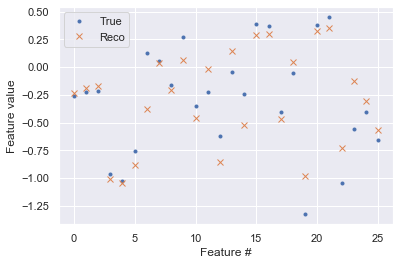

In [37]:
plt.plot(ppdata[0], '.', label='True')
plt.plot(reconstructed[0], 'x', label='Reco')
plt.xlabel('Feature #')
plt.ylabel('Feature value')
plt.legend();

In [38]:
traindata = df.iloc[:,24:].select_dtypes('number')
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 181
Data columns (total 20 columns):
Surface area (km2)                                       167 non-null int64
Population in thousands (2017)                           167 non-null int64
Population density (per km2, 2017)                       167 non-null float64
Sex ratio (m per 100 f, 2017)                            167 non-null float64
GDP: Gross domestic product (million current US$)        167 non-null int64
GDP growth rate (annual %, const. 2005 prices)           167 non-null float64
GDP per capita (current US$)                             167 non-null float64
Economy: Industry (% of GVA)                             167 non-null float64
Economy: Services and other activity (% of GVA)          167 non-null float64
Agricultural production index (2004-2006=100)            167 non-null int64
Food production index (2004-2006=100)                    167 non-null int64
International trade: Imports (million US$)     

In [39]:
target = df['people_vaccinated_per_hundred']

In [42]:
target.mean()

26.134550898203596

In [40]:
rndf = ensemble.RandomForestRegressor().fit(traindata, target)

In [41]:
rndf.score(traindata, target) # coef of determination R^2

0.950399299111026

In [43]:
importance = inspection.permutation_importance(rndf, traindata, target)

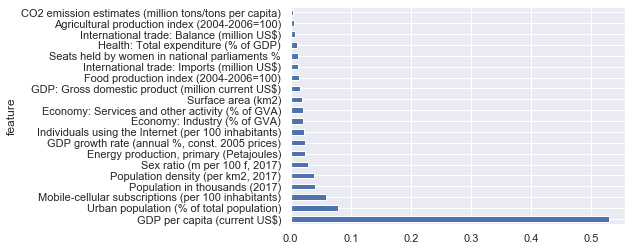

In [44]:
pd.DataFrame(
    {'feature': traindata.columns, 'importance': importance.importances_mean}
).sort_values(
    by='importance', ascending=False
).plot(
    'feature', 'importance', 'barh', legend=False);

In [47]:
target2 = 4 * df['Oxford/AstraZeneca'] + 2 * df['Pfizer/BioNTech'] + 1 * df['Sinovac']

In [46]:
np.unique(target2)

array([0, 2, 3, 4, 5, 6, 7])

In [48]:
rndf2 = ensemble.RandomForestClassifier(max_depth=5).fit(traindata, target2)

In [49]:
rndf2.score(traindata, target2)

0.9101796407185628

In [50]:
importance2 = inspection.permutation_importance(rndf2, traindata, target2)

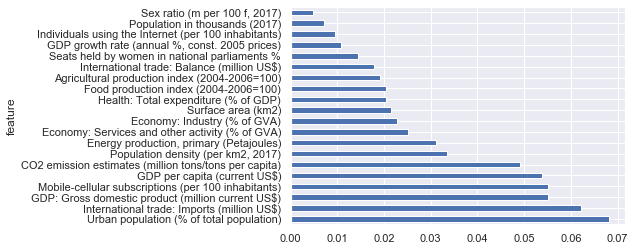

In [51]:
pd.DataFrame(
    {'feature': traindata.columns, 'importance': importance2.importances_mean}
).sort_values(
    by='importance', ascending=False
).plot(
    'feature', 'importance', 'barh', legend=False);